In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.io import loadmat

from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

from turb.lst import lst

In [128]:
mat_f = r'./data/LST_template.mat'
mat_data = loadmat(mat_f)
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'Temperature', 'omega', 'q', 'y_phys'])


In [129]:
df = pd.DataFrame(
   dict(
      eigvals = mat_data['omega'][:, 0],
      eigvecs = [mat_data['Temperature'][:, ind] for ind in range(mat_data['omega'].shape[0])],
      eig_ind = range(mat_data['omega'].shape[0]),
   )
)

In [130]:
# channel_lst = lst(384, 2)
# df = pd.DataFrame(
#    dict(
#       eigvals = channel_lst.omega,
#       eigvecs = [channel_lst.q[:, ind] for ind in range(channel_lst.omega.shape[0])],
#       eig_ind = range(channel_lst.omega.shape[0]),
#    )
# )
# y_phys = channel_lst.y_phys

In [134]:
app = Dash(__name__, external_stylesheets=external_stylesheets)


app.layout = html.Div([
    html.Div([
        html.Div([
            "Layer Number: ",
            dcc.Input(id='layer_number', value=384, type='number')
        ]),

        html.Div([
            "Point Index: ",
            dcc.Input(id='point_index', value=0, type='number')
        ]),

        ]),
    
        html.Div([
            dcc.Graph(
                id='eigenvals_plot',
                clickData={'points': [{'pointNumber': 0}]}
            )
        ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
        

        html.Div([
            dcc.Graph(id='eigenvector_plot',)
        ], style={'display': 'inline-block', 'width': '49%'})

])

def create_eigvec_plot(y, eigvec, title):
    fig = px.scatter(x=y, y=eigvec[-y.shape[0]:])
    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})
    
    return fig

@callback(
    Output('eigenvals_plot', 'figure'),
    Input('layer_number', 'value')
)
def update_graph(layer_number, ):
    fig = px.scatter(x=np.real(df['eigvals']), y = np.imag(df['eigvals']), hover_name=df["eig_ind"])
    return fig


@callback(
    Output('eigenvector_plot', 'figure'),
    Output('point_index', 'value'),
    Input('eigenvals_plot', 'clickData'),
    Input('layer_number', 'value')
)
def update_eigenmode(clickData, layer_number):
    y_phys = np.cos(np.linspace(0, np.pi, layer_number))
    eig_ind = clickData["points"][0]['pointNumber']
    print(eig_ind)
    fig = px.line(x= y_phys, y= np.abs(df['eigvecs'][eig_ind][-y_phys.shape[0]:]))
    return fig, eig_ind


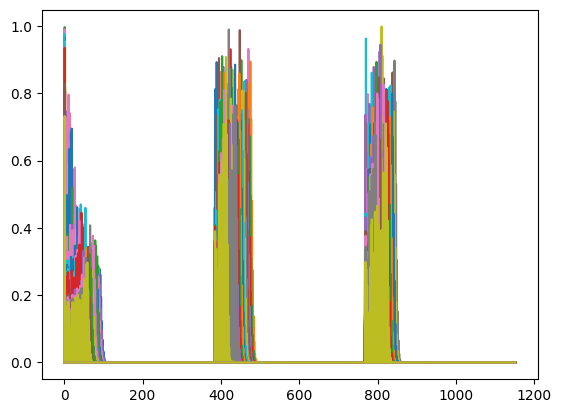

In [135]:
fig, ax = plt.subplots()
ax.plot(np.abs(mat_data['q']))

In [136]:
app.run(debug=True)

0
145
89
8
62
19
160
60
